Boudah Mohamed Lemine C20121

Je m’excuse car notre projet n’a pas été à la hauteur que nous souhaitions. Le temps étant très limité(2 jours) et avec d’autres projets à gérer, nous avons dû le préparer rapidement. Nous vous remercions de votre compréhension et de votre indulgence.

# Phase I - Question 3

## 1. Importation des librairies & Chargement des données

In [3]:
# 1. Importation des librairies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import time

In [4]:
# 2. Création d'un jeu de données synthétique

X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=2, random_state=42)
y = 2*y - 1  # convertir {0,1} -> {-1,1}

## 2. Fonction utilitaires

In [5]:
def sigmoid(t):
    """Fonction sigmoïde"""
    return 1 / (1 + np.exp(-t))

In [6]:
def loss(w, X, y, lambd):
    """Calcul de la loss logistique régularisée L2"""
    z = y * (X @ w)
    return np.mean(np.log(1 + np.exp(-z))) + (lambd/2)*np.linalg.norm(w)**2

In [7]:
def grad_F(w, X, y, lambd):
    """Gradient de F(w)"""
    z = y * (X @ w)
    return -(X.T @ (y * sigmoid(-z))) / X.shape[0] + lambd * w

## 3. Gradient Descent (pas fixe)

In [8]:
def gradient_descent(X, y, lambd, alpha, n_iter):
    """
    Implémentation de la descente de gradient à pas fixe.
    
    Paramètres :
    - X : matrice des données
    - y : labels {-1, 1}
    - lambd : paramètre de régularisation
    - alpha : pas de descente
    - n_iter : nombre d'itérations
    
    Retourne :
    - w : solution finale
    - losses : valeurs de la fonction objectif
    - times : temps cumulés
    """
    n, d = X.shape
    w = np.zeros(d)
    losses = []
    times = []

    start_time = time.time()
    
    for k in range(n_iter):
        w = w - alpha * grad_F(w, X, y, lambd)
        losses.append(loss(w, X, y, lambd))
        times.append(time.time() - start_time)
    
    return w, losses, times


In [9]:
# Paramètres
lambd = 1e-3
n_iter = 200
alpha = 1.0 / (0.25 * np.linalg.norm(X, 2)**2 / X.shape[0] + lambd)

# Lancement de l'algorithme
w_gd, losses_gd, times_gd = gradient_descent(X, y, lambd, alpha, n_iter)

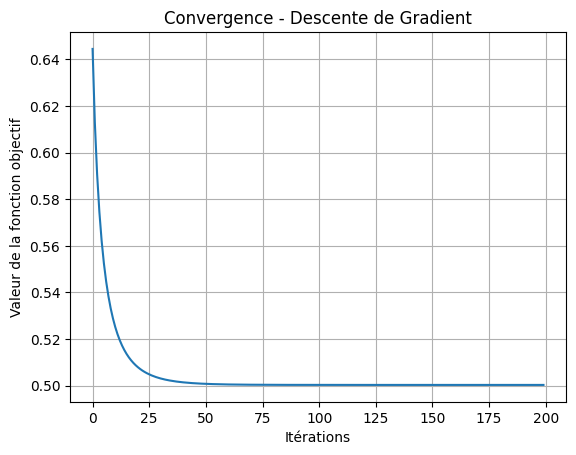

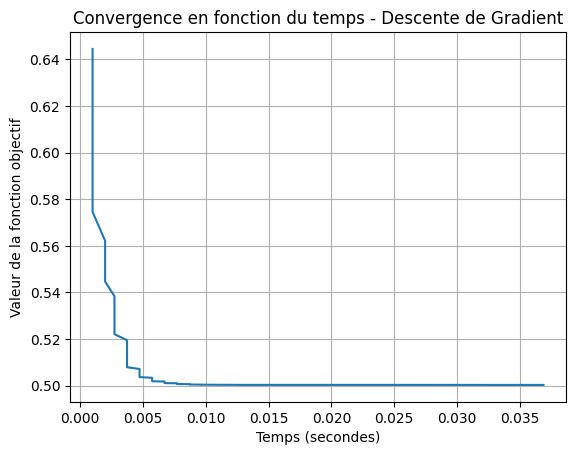

In [11]:
# Visualisation de la convergence

plt.figure()
plt.plot(losses_gd)
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction objectif")
plt.title("Convergence - Descente de Gradient")
plt.grid()
plt.show()

plt.figure()
plt.plot(times_gd, losses_gd)
plt.xlabel("Temps (secondes)")
plt.ylabel("Valeur de la fonction objectif")
plt.title("Convergence en fonction du temps - Descente de Gradient")
plt.grid()
plt.show()


## 4. Gradient Conjugé

In [12]:
def conjugate_gradient(X, y, lambd, n_iter):
    """
    Implémentation simplifiée du gradient conjugué
    pour la régression logistique régularisée.
    """
    n, d = X.shape
    w = np.zeros(d)
    r = -grad_F(w, X, y, lambd)
    p = r.copy()
    losses = []
    times = []

    start_time = time.time()

    for k in range(n_iter):
        Ap = grad_F(p, X, y, lambd)
        alpha = (r @ r) / (p @ Ap + 1e-8)
        w = w + alpha * p
        r_new = r - alpha * Ap
        beta = (r_new @ r_new) / (r @ r + 1e-8)
        p = r_new + beta * p
        r = r_new

        losses.append(loss(w, X, y, lambd))
        times.append(time.time() - start_time)

    return w, losses, times


In [13]:
# Lancement du gradient conjugué
w_cg, losses_cg, times_cg = conjugate_gradient(X, y, lambd, n_iter)

C:\Users\HP\AppData\Local\Temp\ipykernel_12116\2572807870.py:4: RuntimeWarning: overflow encountered in exp
  return np.mean(np.log(1 + np.exp(-z))) + (lambd/2)*np.linalg.norm(w)**2


## 5. Courbes de convergence

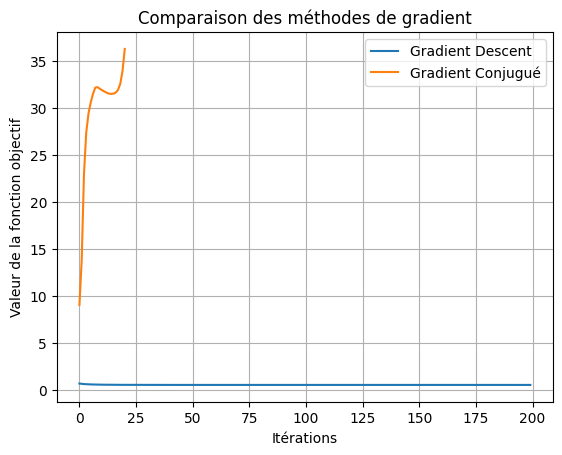

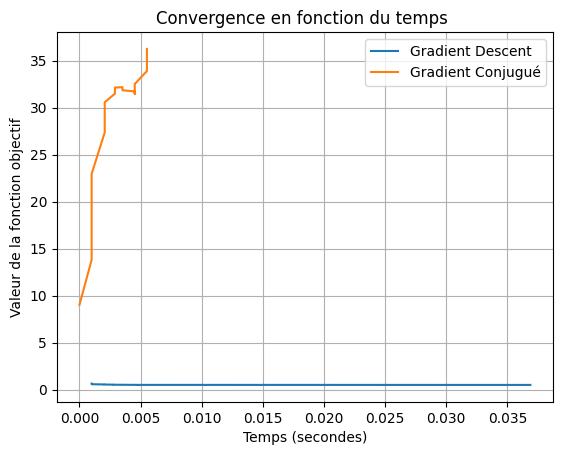

In [21]:
# Comparaison des courbes
plt.figure()
plt.plot(losses_gd, label="Gradient Descent")
plt.plot(losses_cg, label="Gradient Conjugué")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction objectif")
plt.title("Comparaison des méthodes de gradient")
plt.legend()
plt.grid()
plt.savefig("ph1_q3_1.png")
plt.show()

plt.figure()
plt.plot(times_gd, losses_gd, label="Gradient Descent")
plt.plot(times_cg, losses_cg, label="Gradient Conjugué")
plt.xlabel("Temps (secondes)")
plt.ylabel("Valeur de la fonction objectif")
plt.title("Convergence en fonction du temps ")
plt.legend()
plt.grid()
plt.savefig("ph1_q3_2.png")
plt.show()

# Phase II

## 1. Descente de Gradient Stochastique (SGD)

In [17]:
#Fonction utilitaires

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w, X, y):
    z = y * (X @ w)
    return np.mean(np.log(1 + np.exp(-z)))

def stochastic_gradient(w, x_i, y_i):
    z = y_i * np.dot(x_i, w)
    grad = -y_i * x_i / (1 + np.exp(z))
    return grad

In [18]:
def SGD(X, y, alpha0=0.1, epochs=20):
    n, d = X.shape
    w = np.zeros(d)
    
    losses = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        
        for k, i in enumerate(indices):
            alpha = alpha0 / (1 + k)  # règle de décroissance du pas
            grad = stochastic_gradient(w, X[i], y[i])
            w = w - alpha * grad
        
        loss_epoch = logistic_loss(w, X, y)
        losses.append(loss_epoch)
    
    return w, losses


In [19]:
#lancement de l'algorithme
w_sgd, losses_sgd = SGD(X, y, alpha0=0.5, epochs=30)

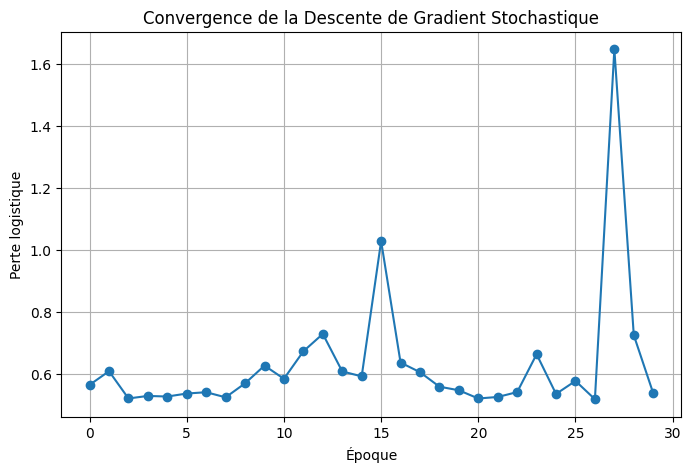

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(losses_sgd, marker='o')
plt.xlabel("Époque")
plt.ylabel("Perte logistique")
plt.title("Convergence de la Descente de Gradient Stochastique")
plt.grid(True)
plt.savefig("ph2_q1_1.png")
plt.show()


## 2. RMSProp et Adam

### Inplémentation de RMSProp

In [23]:
def RMSProp(X, y, alpha=0.01, beta=0.9, epochs=20, epsilon=1e-8):
    n, d = X.shape
    w = np.zeros(d)
    v = np.zeros(d)  # moyenne exponentielle des gradients au carré
    
    losses = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            grad = stochastic_gradient(w, X[i], y[i])
            v = beta * v + (1 - beta) * (grad ** 2)
            w = w - alpha * grad / (np.sqrt(v) + epsilon)
        
        losses.append(logistic_loss(w, X, y))
    
    return w, losses


In [24]:
w_rms, losses_rms = RMSProp(X, y, alpha=0.01, epochs=30)

### Implémentation d' Adem

In [25]:
def Adam(X, y, alpha=0.01, beta1=0.9, beta2=0.999, epochs=20, epsilon=1e-8):
    n, d = X.shape
    w = np.zeros(d)
    
    m = np.zeros(d)  # moyenne des gradients
    v = np.zeros(d)  # moyenne des gradients au carré
    
    losses = []
    t = 0
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        
        for i in indices:
            t += 1
            grad = stochastic_gradient(w, X[i], y[i])
            
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * (grad ** 2)
            
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            
            w = w - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
        
        losses.append(logistic_loss(w, X, y))
    
    return w, losses


In [26]:
w_adam, losses_adam = Adam(X, y, alpha=0.01, epochs=30)


### Comparesion entre SGD, RMSProp et Adem

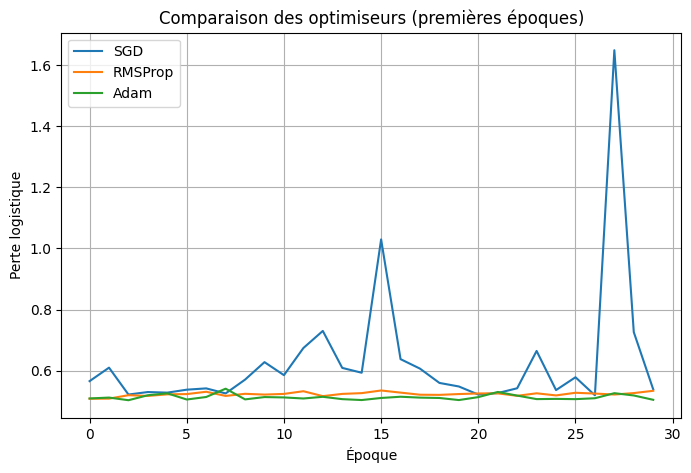

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(losses_sgd, label="SGD")
plt.plot(losses_rms, label="RMSProp")
plt.plot(losses_adam, label="Adam")
plt.xlabel("Époque")
plt.ylabel("Perte logistique")
plt.title("Comparaison des optimiseurs (premières époques)")
plt.legend()
plt.grid(True)
plt.savefig("ph2_q2_1.png")
plt.show()


# Phase III - Algorithmes 

In [28]:
#Fonctions utiles

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_L1(w, X, y):
    z = y * (X @ w)
    return np.mean(np.log(1 + np.exp(-z)))

def soft_thresholding(v, lambd):
    return np.sign(v) * np.maximum(np.abs(v) - lambd, 0)


## ISTA – Implémentation

In [29]:
def ISTA(X, y, lambd=0.1, alpha=0.1, epochs=50):
    n, d = X.shape
    w = np.zeros(d)
    losses = []

    for k in range(epochs):
        grad = -(X.T @ (y / (1 + np.exp(y * (X @ w))))) / n
        w = soft_thresholding(w - alpha * grad, alpha * lambd)
        losses.append(logistic_loss_L1(w, X, y) + lambd * np.linalg.norm(w, 1))

    return w, losses


## FISTA – Implémentation accélérée

In [30]:
def FISTA(X, y, lambd=0.1, alpha=0.1, epochs=50):
    n, d = X.shape
    w = np.zeros(d)
    z = w.copy()
    t = 1
    losses = []

    for k in range(epochs):
        grad = -(X.T @ (y / (1 + np.exp(y * (X @ z))))) / n
        w_new = soft_thresholding(z - alpha * grad, alpha * lambd)
        t_new = (1 + np.sqrt(1 + 4 * t**2)) / 2
        z = w_new + ((t - 1) / t_new) * (w_new - w)
        w = w_new
        t = t_new
        losses.append(logistic_loss_L1(w, X, y) + lambd * np.linalg.norm(w, 1))

    return w, losses


## Exécution ISTA et FISTA

In [31]:
lambd = 0.1
alpha = 0.1
epochs = 50

w_ista, losses_ista = ISTA(X, y, lambd, alpha, epochs)
w_fista, losses_fista = FISTA(X, y, lambd, alpha, epochs)


## Visualisation de la convergence

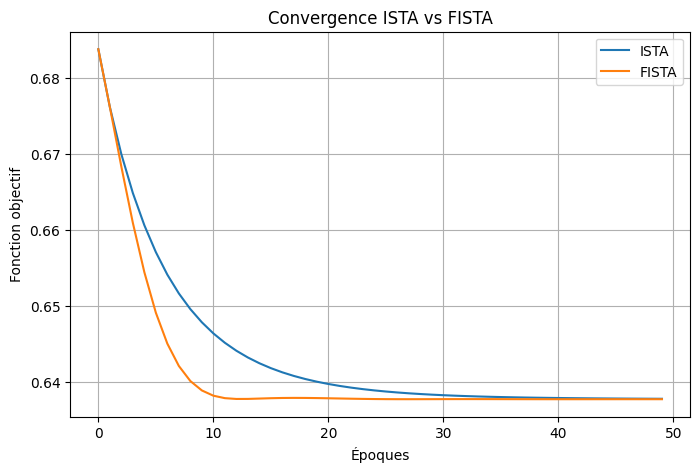

In [33]:
plt.figure(figsize=(8,5))
plt.plot(losses_ista, label="ISTA")
plt.plot(losses_fista, label="FISTA")
plt.xlabel("Époques")
plt.ylabel("Fonction objectif")
plt.title("Convergence ISTA vs FISTA")
plt.legend()
plt.grid(True)
plt.savefig("ph3_q2_1.png")
plt.show()


## Analyse de la parcimonie en fonction de λ

### Définir plusieurs valeurs de λ

In [35]:
lambdas = [0.01, 0.05, 0.1, 0.2, 0.5]
null_coeffs_ista = []
null_coeffs_fista = []

alpha = 0.1
epochs = 50

for l in lambdas:
    w_ista, _ = ISTA(X, y, lambd=l, alpha=alpha, epochs=epochs)
    w_fista, _ = FISTA(X, y, lambd=l, alpha=alpha, epochs=epochs)
    null_coeffs_ista.append(np.sum(w_ista == 0))
    null_coeffs_fista.append(np.sum(w_fista == 0))


### Visualisation de la parcimonie

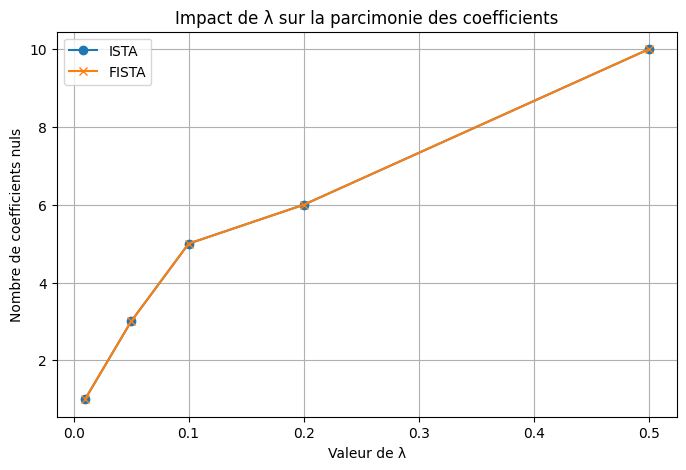

In [36]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, null_coeffs_ista, marker='o', label="ISTA")
plt.plot(lambdas, null_coeffs_fista, marker='x', label="FISTA")
plt.xlabel("Valeur de λ")
plt.ylabel("Nombre de coefficients nuls")
plt.title("Impact de λ sur la parcimonie des coefficients")
plt.legend()
plt.grid(True)
plt.savefig("ph3_q3_1.png")
plt.show()
